In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
%matplotlib inline

#### Testing K-means

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
K = 2
initial_centroids = utils.k_means_init_centroids(X, K)
utils.run_k_means(X=X, initial_centroids=initial_centroids, max_iters=10, plot_progress=False)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 576x432 with 0 Axes>

(array([[ 1.,  2.],
        [10.,  2.]]),
 array([0, 0, 0, 1, 1, 1]))

#### Using K-means for image compression

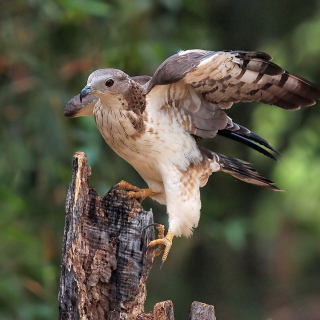

In [20]:
import PIL.Image as Image
img = plt.imread('bird.jpg')
img_pil = Image.fromarray(np.uint8(img))
img_pil.resize((256, 256), resample=Image.BILINEAR)
img_pil

In [7]:
img = img / 255
original_shape = img.shape
X_img = np.reshape(img, (img.shape[0] * img.shape[1], 3))
X_img.shape

(102400, 3)

In [5]:
K = 16
max_iters = 10
initial_centroids = utils.k_means_init_centroids(X_img, K)
centroids, idx = utils.run_k_means(X=X_img, initial_centroids=initial_centroids, max_iters=max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 576x432 with 0 Axes>

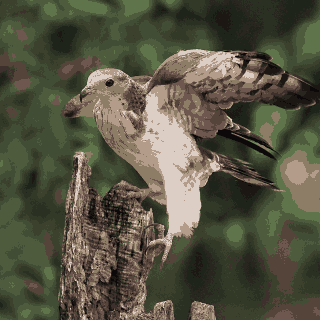

In [24]:
X_compressed = utils.compress_image(X_img, centroids=centroids, idx=idx, K=K)
X_compressed = np.reshape(X_compressed*255, original_shape)
img_pil_compressed = Image.fromarray(np.uint8(X_compressed))
img_pil_compressed